In [1]:
from matplotlib import pyplot as plt
from numpy.random import randn
%matplotlib inline
import numpy as np
import color_converter
import color_blending_operator

(array([[ 1.,  1.,  0., ...,  0.,  0.,  0.],
        [ 0.,  1.,  0., ...,  0.,  0.,  0.],
        [ 1.,  0.,  2., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  1.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  1.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  1.]]),
 array([-4.08545436, -3.91421823, -3.74298209, -3.57174596, -3.40050982,
        -3.22927369, -3.05803755, -2.88680141, -2.71556528, -2.54432914,
        -2.37309301, -2.20185687, -2.03062074, -1.8593846 , -1.68814846,
        -1.51691233, -1.34567619, -1.17444006, -1.00320392, -0.83196778,
        -0.66073165, -0.48949551, -0.31825938, -0.14702324,  0.02421289,
         0.19544903,  0.36668517,  0.5379213 ,  0.70915744,  0.88039357,
         1.05162971,  1.22286585,  1.39410198,  1.56533812,  1.73657425,
         1.90781039,  2.07904652,  2.25028266,  2.4215188 ,  2.59275493,
         2.76399107,  2.9352272 ,  3.10646334,  3.27769948,  3.44893561,
         3.62017175,  3.79140788,  3.96264402,  4.1338801

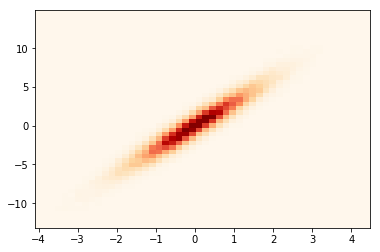

In [95]:
x_1 = np.random.normal(size=50000)
y_1 = x_1 * 3 + np.random.normal(size=50000)
x_2 = np.random.normal(size=50000)
y_2 = x_2 * -3 + np.random.normal(size=50000) + 10
plt.hist2d(x_1, y_1, bins=(50, 50), cmap=plt.cm.OrRd)

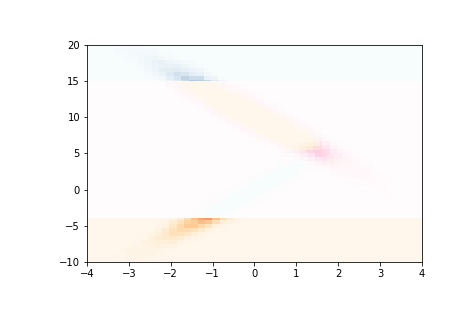

In [101]:
fig, ax = plt.subplots()
ax.hist2d(x_1, y_1, bins=(50, 50), cmap=plt.cm.OrRd)
ax.set_xlim(-4, 4)
ax.set_ylim(-10, 20)
ax.patch.set_facecolor("none")
ax.patch.set_edgecolor("none")
fig.canvas.draw()

w, h = fig.canvas.get_width_height()
img = np.frombuffer(fig.canvas.buffer_rgba(), np.uint8).reshape(h, w, -1).copy()
ax.clear()
ax.hist2d(x_2, y_2, bins=(50, 50), cmap=plt.cm.BuPu)
ax.set_xlim(-4, 4)
ax.set_ylim(-10, 20)
ax.patch.set_facecolor("none")
ax.patch.set_edgecolor("none")
fig.canvas.draw()

img2 = np.frombuffer(fig.canvas.buffer_rgba(), np.uint8).reshape(h, w, -1).copy()

img[img[:, :, -1] == 0] = 0
img2[img2[:, :, -1] == 0] = 0

fig.clf()

plt.imshow(np.maximum(img, img2))
plt.subplots_adjust(0, 0, 1, 1)
# removes axis for picture
plt.axis("off")
plt.show()

In [75]:
def convert(a,b,alpha):
    def convert_rgb01(x):
        return color_converter.rgb255_to_rgb01(x)
    def convert_rgb255(x):
        return color_converter.rgb01_to_rgb255(x)
    return [*convert_rgb255(color_blending_operator.porter_duff_source_over(convert_rgb01(a),convert_rgb01(b),alpha))]

In [40]:
list(convert([255, 122, 132, 2],[255, 122, 132, 2],0.5))

[1.0, 0.47843137254901963, 0.51764705882352946, 0]

In [98]:
reduce = np.zeros([h,w,3])
for i in range(h):
    for j in range(w):
        reduce[i][j] = convert(img[i][j],img2[i][j],0.5)

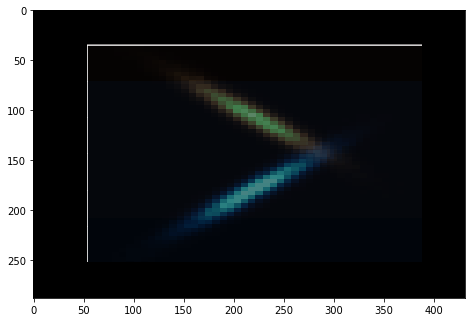

In [102]:

# displays an image
plt.imshow(reduce)
plt.subplots_adjust(0, 0, 1, 1)

# removes axis for picture
#plt.axis("off")
plt.show()